In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nvdenrichment as nvde

In [56]:
concentrations = {"233": .001, "234": .0055, "235": (.72, 75, .5), "236": .5}
mic = nvde.Multi_isotope(process='centrifuge', concentrations=concentrations, alpha235=1.3, max_swu=1e6, feed=100)
mic.calculate_staging()

(71.40437923756119, 1.802014219267079)

In [57]:
def u236tail_vs_enrichment():
    concentrations = {"233": .001, "234": .0055, "235": (.72, 73, .5), "236": .5}
    mic = nvde.Multi_isotope(process='centrifuge', concentrations=concentrations, alpha235=1.3, max_swu=1e6, feed=100)
    mic.calculate_staging()
    
    enrichments = np.linspace(5, 72, 100)
    tail_u236 = np.zeros_like(enrichments)
    for (i, e) in enumerate(enrichments):
        mic.set_product_enrichment(e)
        mic.calculate_staging()
        tail_u236[i] = mic.xt[4]
    
    return enrichments, tail_u236

In [58]:
enrichments, tails = u236tail_vs_enrichment()

Text(0, 0.5, 'U236 concentration')

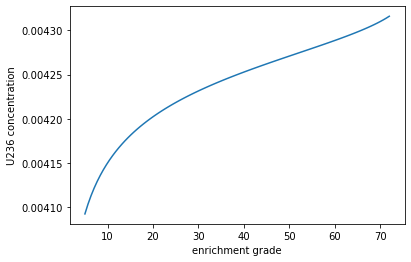

In [59]:
plt.plot(enrichments, tails)
plt.xlabel('enrichment grade')
plt.ylabel('U236 concentration')